In [351]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

%matplotlib inline

# Import data.

In [352]:
data = pd.read_csv('main_data/main_data_no_vec.csv', index_col=0)
#remove floats from tokens column
data.tokens.dropna(inplace=True)
data.shape

(39512, 11)

In [353]:
data.index

Index(['2020-08-17', '2020-08-16', '2020-08-13', '2020-08-12', '2020-08-12',
       '2020-08-12', '2020-08-12', '2020-08-10', '2020-07-30', '2020-07-17',
       ...
       '2015-09-21', '2015-09-21', '2015-09-21', '2015-09-21', '2015-09-21',
       '2015-09-21', '2015-09-20', '2015-09-20', '2015-09-20', '2015-09-20'],
      dtype='object', length=39512)

In [354]:
# Reset the index in order to 
data.reset_index(inplace=True)
data['index'] = pd.to_datetime(data['index'], format='%Y-%m-%d')
data.rename(columns={'index': 'date'}, inplace=True)

In [228]:
data.head(2)

,date,update,source,author,fulltext,summary,title,cleaned_text,cleaned_authors,news_outlet,sentiment,tokens
0,2020-08-17,NaN,https://gizmodo.com/apple-renames-apple-beats-...,[],Photo : JOSH EDELSON/AFP ( Getty Images )\n\nA...,NaN,"Apple Renames Apple Beats 1 Apple Music 1, Not...",photo josh edelson afp getty images apple toda...,NaN,gizmodo,positive,"photo, image, apple, today, announced, adding,..."
1,2020-08-16,2020-08-17 21:20:26+01:00,https://www.dailymail.co.uk/sciencetech/articl...,"['Stacy Liberatore', 'Stacy Liberatore For Dai...",Apple retaliated against Epic Games after bein...,NaN,Apple bans Epic Games from App store after ant...,apple retaliated against epic games after bein...,stacy liberatore stacy liberatore for dailymai...,dailymail,positive,"apple, retaliated, epic, game, served, anti, t..."


# Dummy sentiment column

In [355]:
sentiment_dummies = pd.get_dummies(data['sentiment'], prefix='sent')
data = pd.concat([data, sentiment_dummies], axis=1)

###### Add a column of 1's for when we aggregate all info into one column, we can add the 1's later to get the total articles per day. 

In [356]:
data['total_articles'] = 1

In [765]:
data.news_outlet.nunique()

448

# Breakdown of News Sources

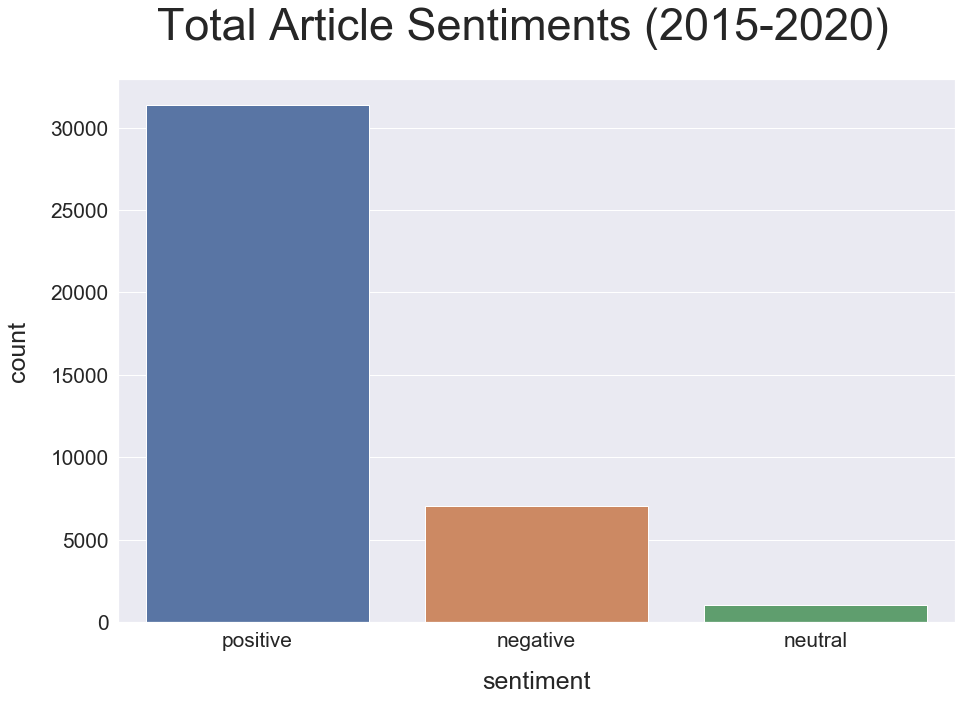

In [238]:
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Total Article Sentiments (2015-2020)', fontsize=45)
plt.xlabel('Sentiment', fontsize=25, labelpad=20)
plt.ylabel('Number of Articles', fontsize=25, labelpad=20)
sns.countplot('sentiment', data=data);

In [239]:
# Now we can drop the sentiment string values from the main dataframe.
data.drop(['sentiment'], axis=1, inplace=True)

#### Which news outlets produce the most articles?

In [13]:
total_articles_per_outlet = data.groupby('news_outlet')['total_articles'].sum().nlargest(10)

In [14]:
outlet = total_articles_per_outlet.index.to_list()
total_stories = total_articles_per_outlet.values

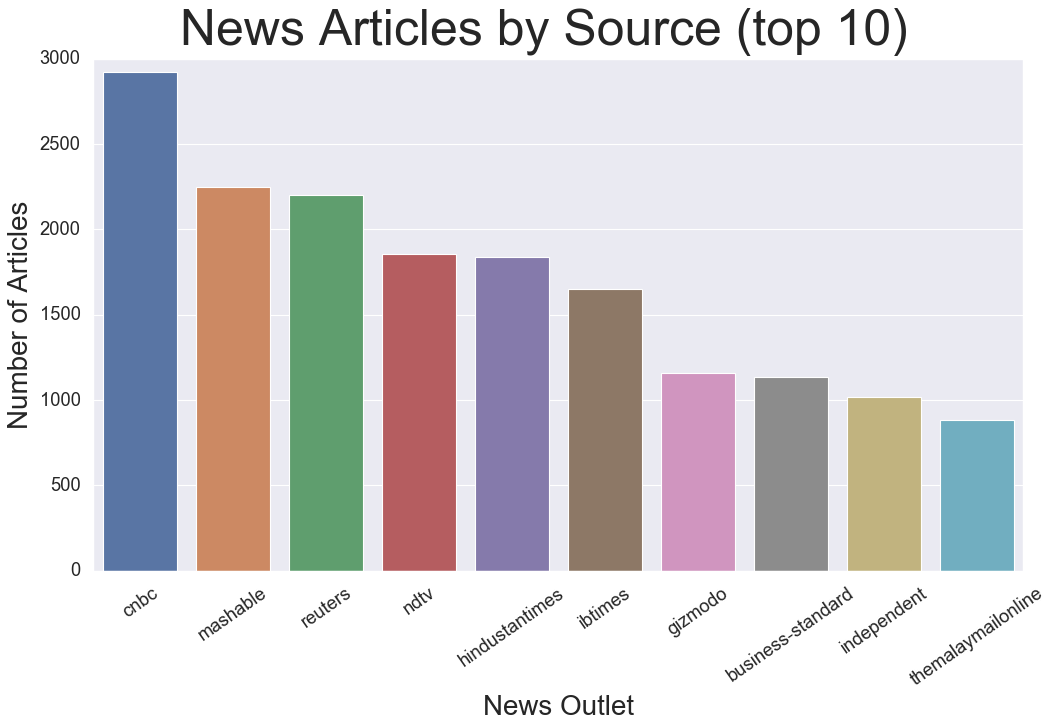

AttributeError: module 'matplotlib.pyplot' has no attribute 'savetxt'

In [762]:
fig, ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation=35)
sns.set(font_scale = 1.5)
sns.barplot(outlet, total_stories, ax=ax)
fig.suptitle('News Articles by Source (top 10)', fontsize=45)
plt.xlabel('News Outlet', fontsize=25)
plt.ylabel('Number of Articles', fontsize=25);
plt.show()
plt.savefig('news_article_by_source.png')

#### Top 10 news outlets giving negative coverage

In [16]:
negative_stories = data.groupby('news_outlet')['sent_negative'].sum().nlargest(10)
neg_df = pd.DataFrame(negative_stories)
neg_df.reset_index(inplace=True)

In [17]:
neg_df.news_outlet.to_list() #top negative news

['reuters',
 'cnbc',
 'ndtv',
 'hindustantimes',
 'mashable',
 'business-standard',
 'dailymail',
 'ibtimes',
 'gizmodo',
 'telegraph']

In [18]:
nega = data.loc[(data['news_outlet'] == 'reuters') |
        (data['news_outlet'] == 'cnbc') |
        (data['news_outlet'] == 'ndtv')|
        (data['news_outlet'] == 'hindustantimes')|
        (data['news_outlet'] == 'mashable')|
        (data['news_outlet'] == 'business-standard')|
        (data['news_outlet'] == 'dailymail')|
        (data['news_outlet'] == 'ibtimes')|
        (data['news_outlet'] == 'gizmodo')|
        (data['news_outlet'] == 'telegraph')]

In [19]:
positive_stories = nega.groupby('news_outlet')['sent_positive'].sum().nlargest(10)
pos_df = pd.DataFrame(positive_stories)
pos_df.reset_index(inplace=True)

In [20]:
neg_df

,news_outlet,sent_negative
0,reuters,547.0
1,cnbc,476.0
2,ndtv,372.0
3,hindustantimes,312.0
4,mashable,271.0
5,business-standard,252.0
6,dailymail,238.0
7,ibtimes,235.0
8,gizmodo,214.0
9,telegraph,191.0


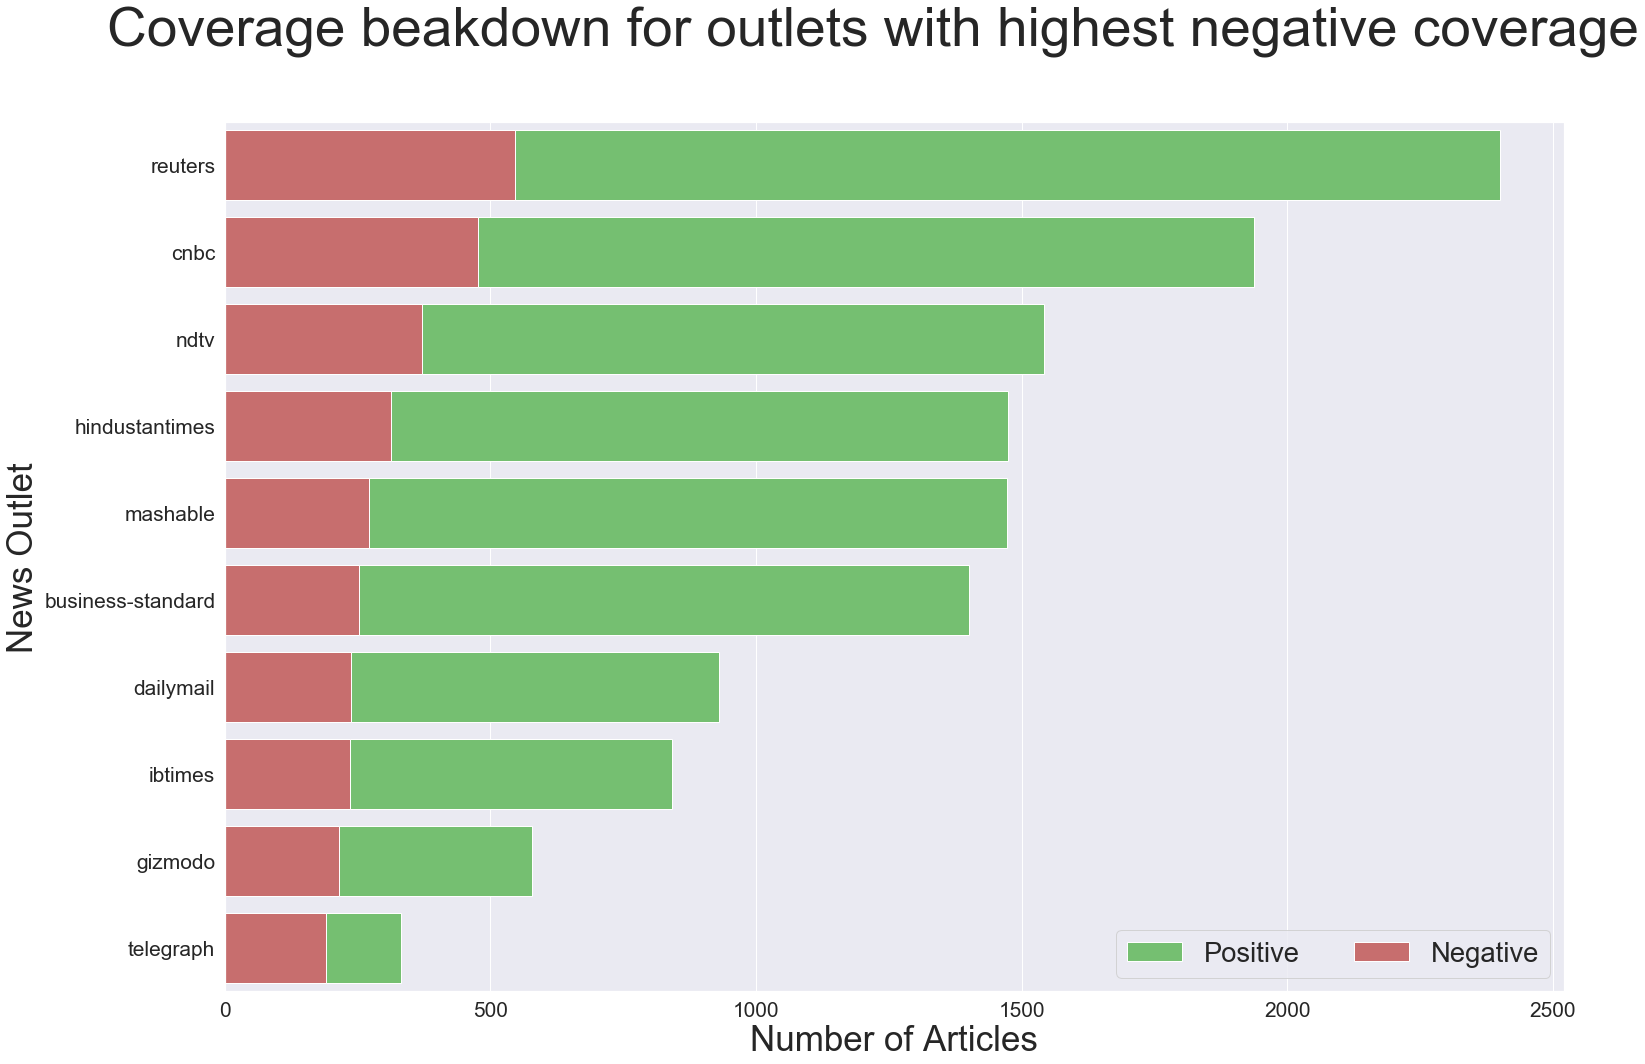

In [21]:
sns.set_context('paper')
sns.set(font_scale = 1.9)
fig, ax = plt.subplots(figsize = (24,16))
sns.set_color_codes('muted')
bar1 = sns.barplot(x = 'sent_positive', y = 'news_outlet', data = pos_df,
            label = 'Positive', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
bar2 = sns.barplot(x = 'sent_negative', y = 'news_outlet', data = neg_df,
            label = 'Negative', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right', fontsize='large')
fig.suptitle('Coverage beakdown for outlets with highest negative coverage', fontsize=55)
plt.ylabel('News Outlet', fontsize=35)
plt.xlabel('Number of Articles', fontsize=35);
plt.show()

#### Top 10 news outlets giving positive coverage

In [22]:
positive_stories = data.groupby('news_outlet')['sent_positive'].sum().nlargest(10)
pos_df = pd.DataFrame(positive_stories)
pos_df.reset_index(inplace=True)

In [23]:
pos_df.news_outlet.to_list() #top positive news

['cnbc',
 'mashable',
 'reuters',
 'hindustantimes',
 'ndtv',
 'ibtimes',
 'gizmodo',
 'independent',
 'business-standard',
 'bgr']

In [24]:
posa = data.loc[(data['news_outlet'] == 'cnbc') |
        (data['news_outlet'] == 'mashable') |
        (data['news_outlet'] == 'reuters')|
        (data['news_outlet'] == 'hindustantimes')|
        (data['news_outlet'] == 'ndtv')|
        (data['news_outlet'] == 'ibtimes')|
        (data['news_outlet'] == 'gizmodo')|
        (data['news_outlet'] == 'independent')|
        (data['news_outlet'] == 'business-standard')|
        (data['news_outlet'] == 'bgr')]

In [25]:
negative_stories = posa.groupby('news_outlet')['sent_negative'].sum().nlargest(10)
neg_df = pd.DataFrame(negative_stories)
neg_df.reset_index(inplace=True)

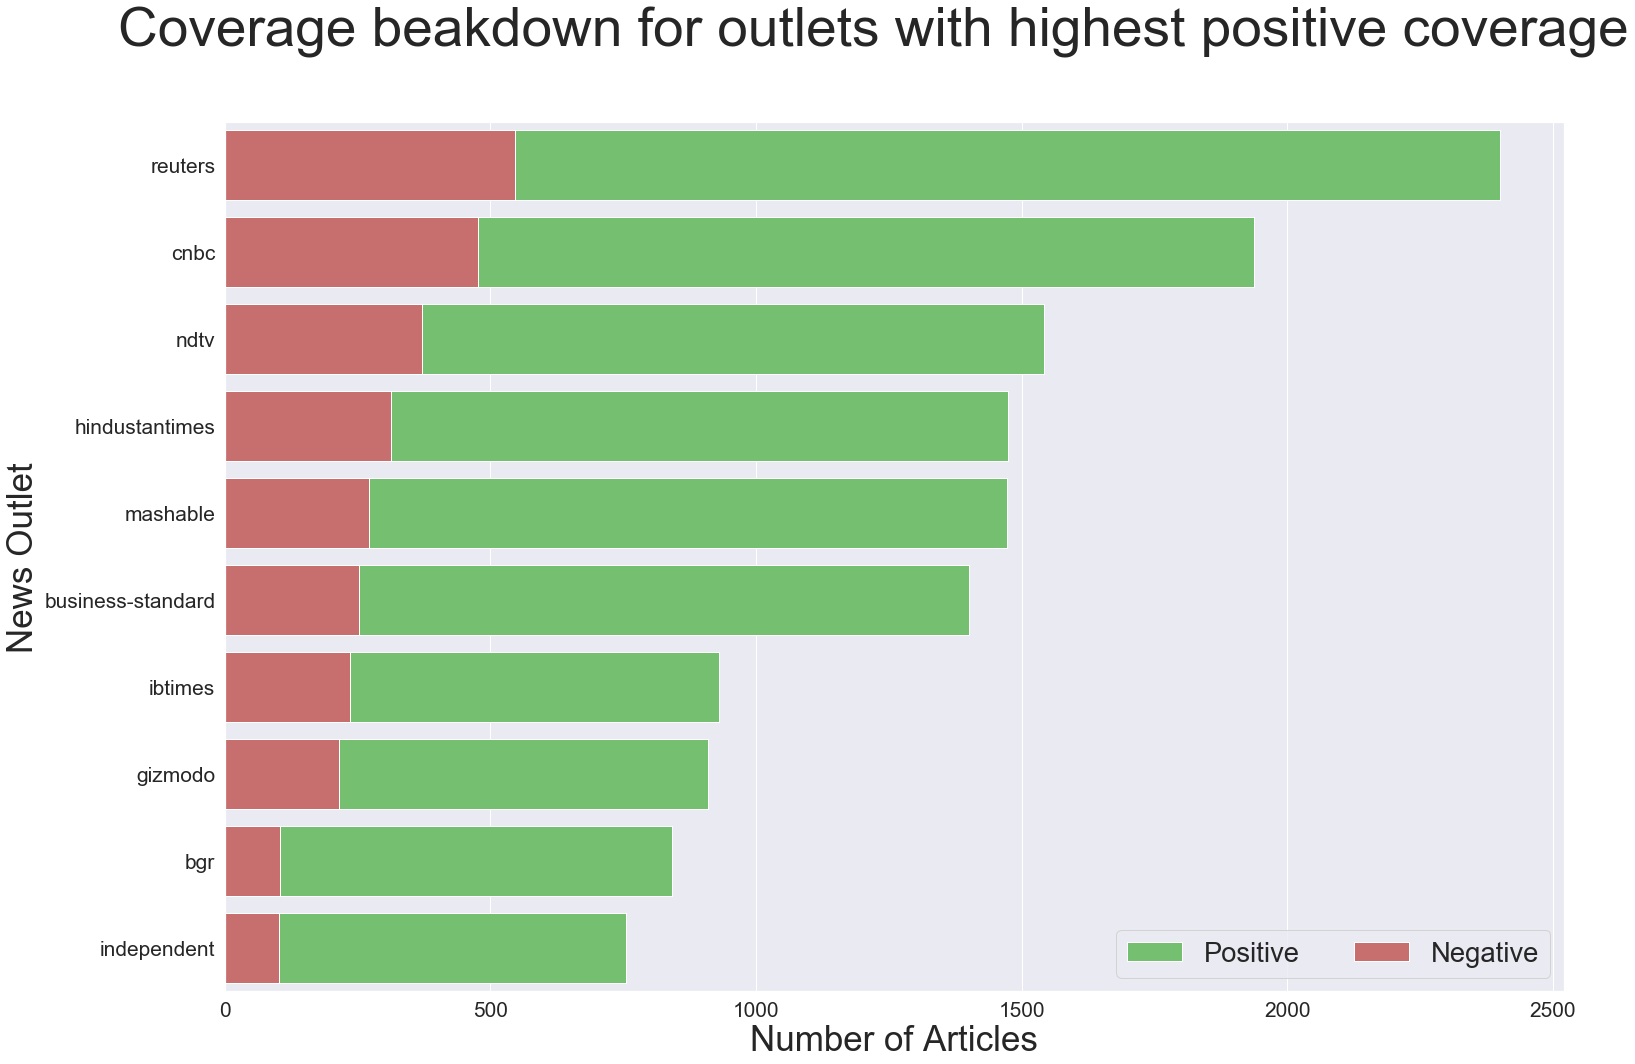

In [26]:
sns.set_context('paper')
sns.set(font_scale = 1.9)
fig, ax = plt.subplots(figsize = (24,16))
sns.set_color_codes('muted')
bar1 = sns.barplot(x = 'sent_positive', y = 'news_outlet', data = pos_df,
            label = 'Positive', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
bar2 = sns.barplot(x = 'sent_negative', y = 'news_outlet', data = neg_df,
            label = 'Negative', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right', fontsize='large')
fig.suptitle('Coverage beakdown for outlets with highest positive coverage', fontsize=55)
plt.ylabel('News Outlet', fontsize=35)
plt.xlabel('Number of Articles', fontsize=35);
plt.show()

In [249]:
data.set_index(data['date'], inplace=True)
data['year'] = data.date.dt.year

# Aggregate daily news articles.

We will perform modeling on the aggregated article text per day. 

In [358]:
daily_data = data.copy()

Our data is in a format that has each row as a new article, we want to aggregate all of the articles on a given day into a single row.

In [359]:
agged_text = daily_data.groupby('date')['cleaned_text'].agg(''.join)

In [215]:
# daily_articles = daily_data.groupby([pd.Grouper(key='index', freq='D')
#                                     ]).agg({'cleaned_text': ' '.join, 'sent_negative':np.sum,
#                                    'sent_neutral':np.sum, 'sent_positive':np.sum, 'total_articles':np.sum})

Add up all of the sentiments for each day, as well as the total number of articles on a given day and merge them on date. 

In [360]:
agged_sent = daily_data.groupby('date')['total_articles'].agg(np.sum)

In [362]:
step_one = pd.merge(agged_text, agged_sent, how='inner', left_index=True, right_index=True)
agged_pos = daily_data.groupby('date')['sent_positive'].agg(np.sum)
agged_neg = daily_data.groupby('date')['sent_negative'].agg(np.sum)

In [363]:
step_two = pd.merge(step_one, agged_pos, how='inner', left_index=True, right_index=True)
step_three = pd.merge(step_two, agged_neg, how='inner', left_index=True, right_index=True)

In [364]:
# Make sure there are no null values.
step_three.isna().sum()

cleaned_text      0
total_articles    0
sent_positive     0
sent_negative     0
dtype: int64

In [202]:
#Save the final dataframe.
step_three.to_csv('daily_aggregated.csv')

In [753]:
step_three.head(4)

,cleaned_text,total_articles,sent_positive,sent_negative
date,,,,
2014-12-31,apple inc misleads consumers about the amount ...,4,2,2
2015-01-01,apple fans got much of what they asked for and...,8,5,3
2015-01-02,apple on friday faced a lawsuit accusing it of...,7,2,5
2015-01-03,stay on top of enterprise technology trends ge...,5,5,0


# Merge With Stock Price Info

In [403]:
targs = pd.read_csv('yearly_actuals/actuals.csv', index_col=0, parse_dates=True)
targs.drop(['increase_x', 'day_change_y', 'increase_y'], axis=1, inplace=True)

In [404]:
targs=pd.merge(targs,plot_dates, how='inner', left_index=True, right_index=True)

Create a rolling window to visualize the time series trends.

In [780]:
roll_mean= targs.rolling(window=30).mean()


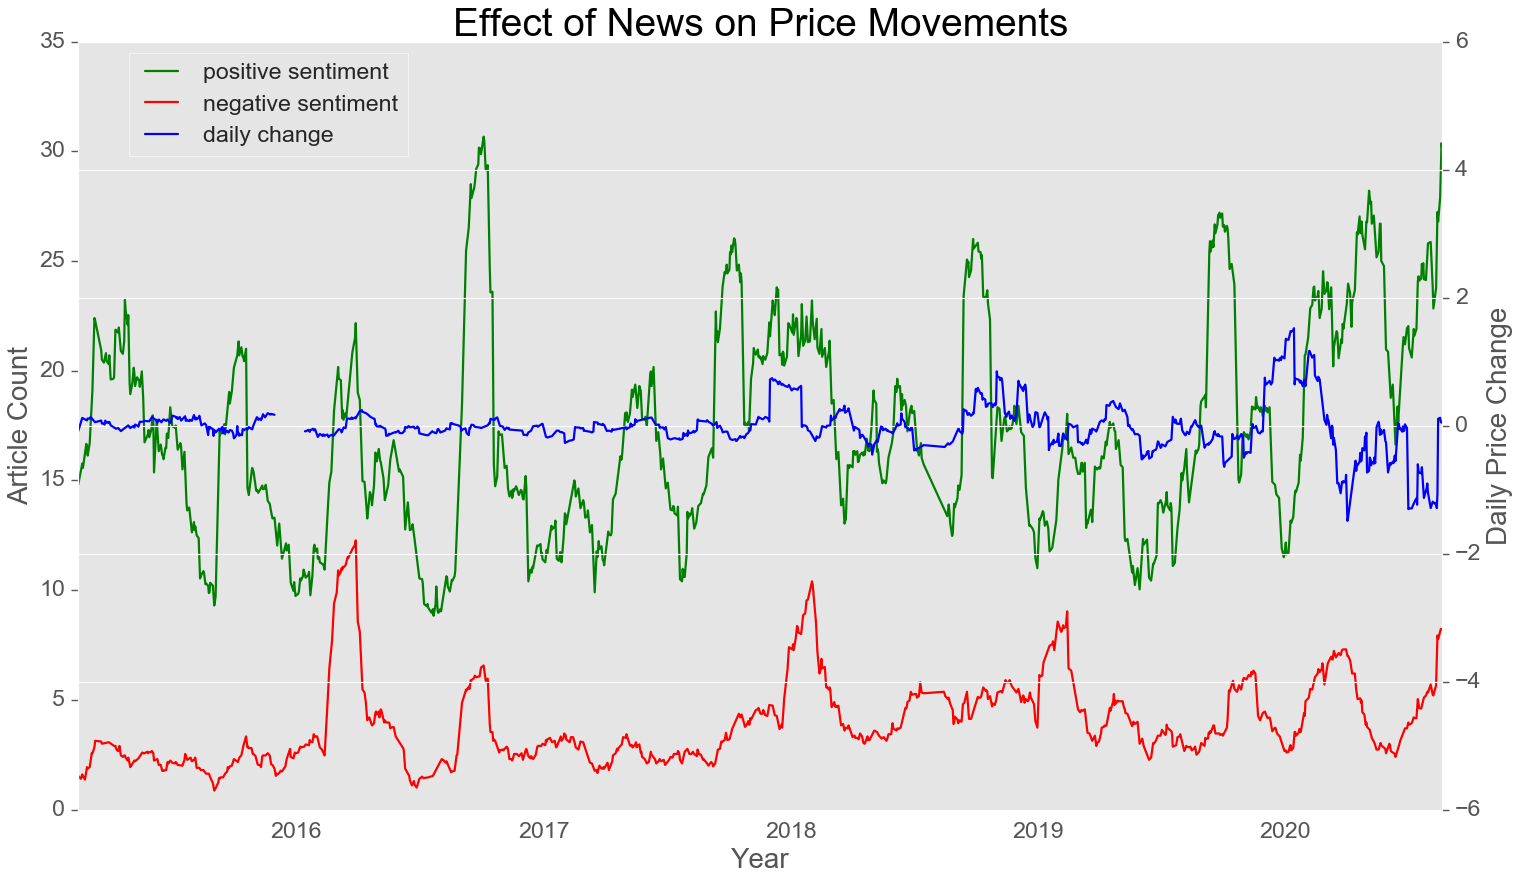

In [781]:
fig, ax = plt.subplots(figsize=(22,12))
ax2 = ax.twinx()
sns.set(font_scale = 1.9)
plt.style.use('ggplot')
ax.plot(roll_mean.sent_positive, lw=2, color='green', label='positive sentiment')
ax.plot(roll_mean.sent_negative, lw=2, color='red', label='negative sentiment')
ax.set_ylabel('Article Count', fontsize=25)
ax.set_xlabel('Year', fontsize=25)

ax2.plot(roll_mean.day_change_x, lw=2, color='blue',label='daily change');
ax2.set_ylim([-6,6])
ax.grid(False)

ax2.set_ylabel('Daily Price Change', fontsize=25)
plt.title("Effect of News on Price Movements", fontsize=35,color='black')
#Need anchor and transform to incorperate both x axes legends. Otherwise they are seperate.
fig.legend(loc='upper right', bbox_to_anchor=(.25,1), bbox_transform=ax.transAxes)

plt.savefig('images/effect_of_news_on_price.png');

#### Zooming in on interesting time windows

In [567]:
# make date the index so we can subset easily into specific time windows
date_range_search = daily_data.set_index('date')

# Early 2020: Coronavirus Pandemic

In [684]:
early_2020 = date_range_search['2020-1-01':'2020-5-13']
negative_2020 = early_2020.loc[early_2020['sent_negative'] == 1]
positive_2020 = early_2020.loc[early_2020['sent_positive'] == 1]

In [687]:
negative_text_2020 = negative_2020.tokens
neg_text_bag_2020 = " ".join(article for article in negative_text_2020)

positive_text_2020 = positive_2020.tokens
pos_text_bag_2020 = " ".join(article for article in positive_text_2020)

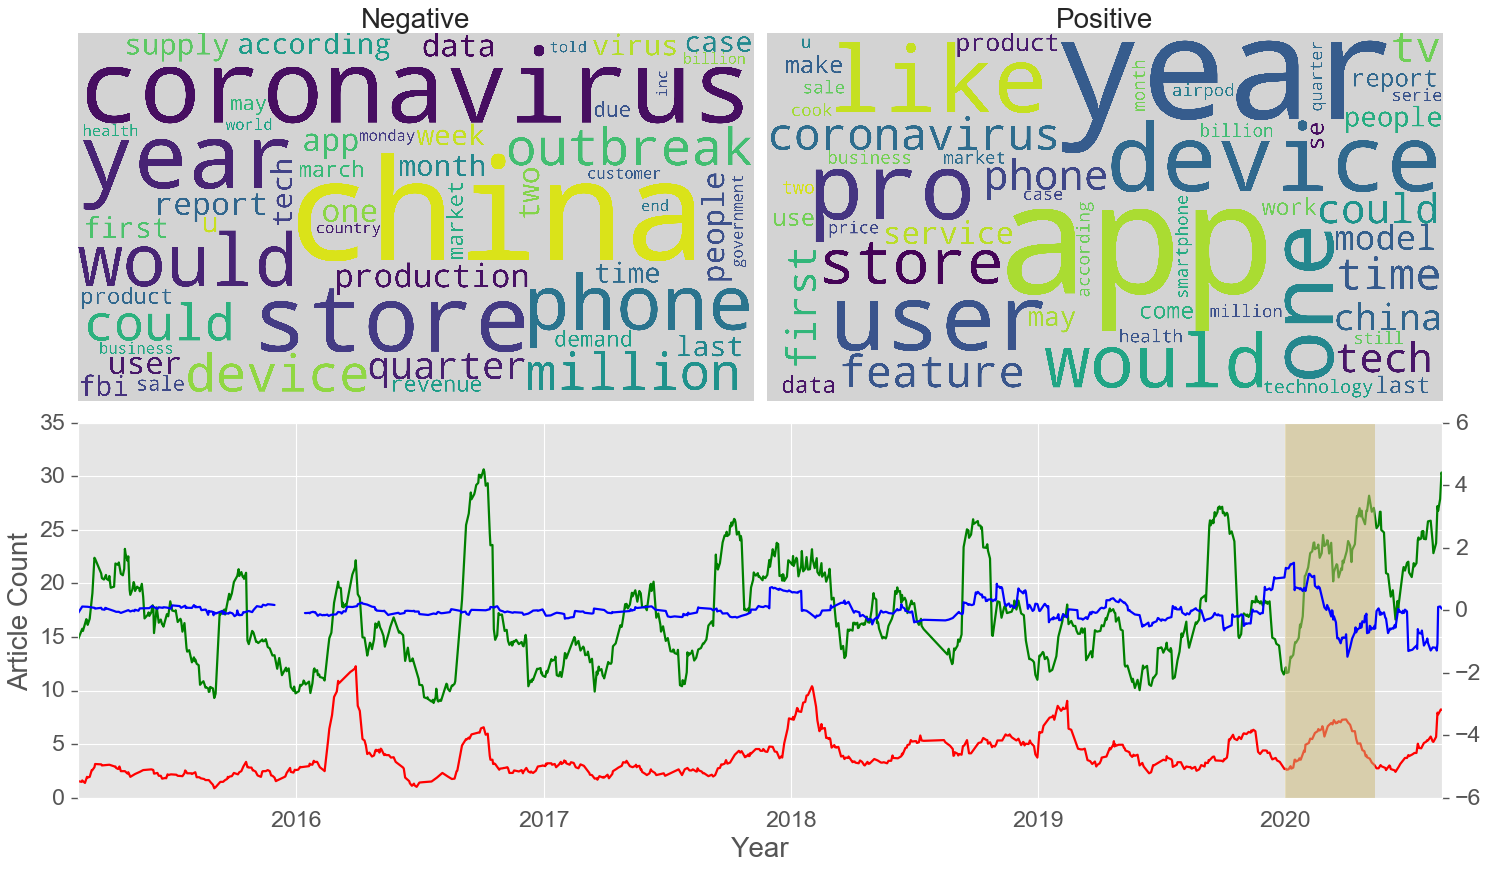

In [720]:
stopwords = ['apple', 'iphone', 'ipad', 'watch', 'company', 'said', 'iphones']

fig, ax = plt.subplots(figsize=(22,12))
plt.subplots_adjust(hspace=.05, wspace=.02)
sns.set(font_scale = 1.9)
plt.style.use('ggplot')

ax1 = plt.subplot(212)
ax4 = ax1.twinx() # daily change line.
ax1.plot(roll_mean.sent_positive, lw=2, color='green', label='positive sentiment')
ax1.plot(roll_mean.sent_negative, lw=2, color='red', label='negative sentiment')
ax1.set_ylabel('Article Count', fontsize=25)
ax1.set_xlabel('Year', fontsize=25)
plt.axvspan(pd.Timestamp('2020-1-01'), pd.Timestamp('2020-5-13'), color='y', alpha=0.5, lw=0)

# twin X axis daily change line
ax4.plot(roll_mean.day_change_x, lw=2, color='blue',label='daily change');
ax4.set_ylim([-6,6])
ax4.grid(False)

ax2 = plt.subplot(222)
ax2.set_title('Positive', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(pos_text_bag_2020)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis("off")

ax3 = plt.subplot(221)
ax3.set_title('Negative', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(neg_text_bag_2020)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis("off")

plt.show();

# Early 2018: Battery/Speed Throttling Controversy 

What effected the stock prices during this period? We can see in the image above both the problems Apple was facing at the time as well as Apples responses. 

In [721]:
early_2018 = date_range_search['2017-12-29':'2018-2-28']
negative_2018 = early_2018.loc[early_2018['sent_negative'] == 1]
positive_2018 = early_2018.loc[early_2018['sent_positive'] == 1]

In [722]:
negative_text_2018 = negative_2018.tokens
neg_text_bag_2018 = " ".join(article for article in negative_text_2018)

positive_text_2018 = positive_2018.tokens
pos_text_bag_2018 = " ".join(article for article in positive_text_2018)

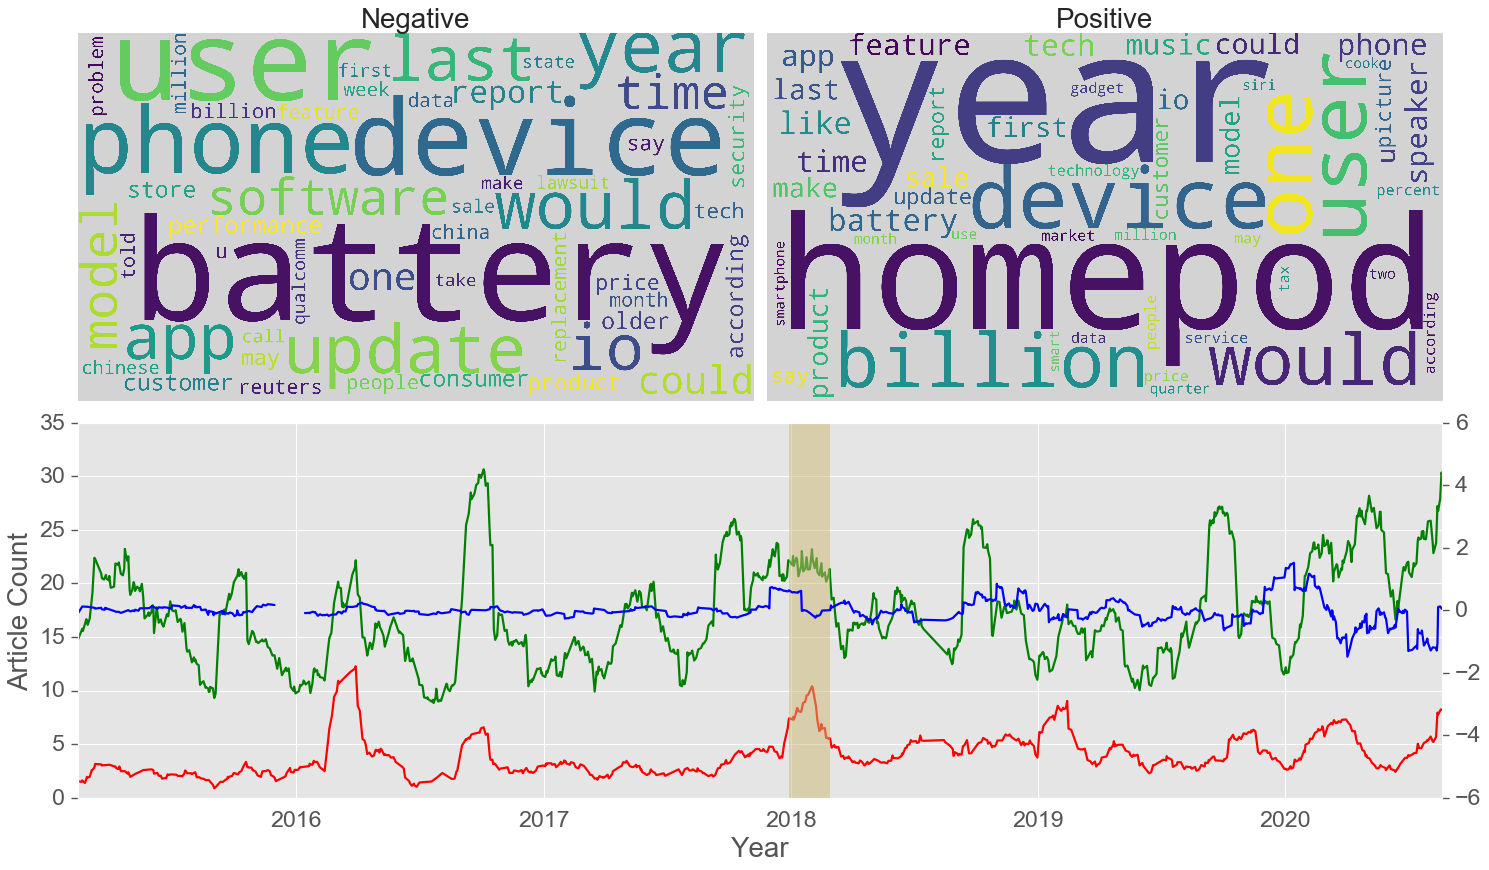

In [723]:

fig, ax = plt.subplots(figsize=(22,12))
plt.subplots_adjust(hspace=.05, wspace=.02)
sns.set(font_scale = 1.9)
plt.style.use('ggplot')

ax1 = plt.subplot(212)
ax4 = ax1.twinx() # daily change line.
ax1.plot(roll_mean.sent_positive, lw=2, color='green', label='positive sentiment')
ax1.plot(roll_mean.sent_negative, lw=2, color='red', label='negative sentiment')
ax1.set_ylabel('Article Count', fontsize=25)
ax1.set_xlabel('Year', fontsize=25)
plt.axvspan(pd.Timestamp('2017-12-29'), pd.Timestamp('2018-2-28'), color='y', alpha=0.5, lw=0)

# twin X axis daily change line
ax4.plot(roll_mean.day_change_x, lw=2, color='blue',label='daily change');
ax4.set_ylim([-6,6])
ax4.grid(False)

ax2 = plt.subplot(222)
ax2.set_title('Positive', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(pos_text_bag_2018)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis("off")

ax3 = plt.subplot(221)
ax3.set_title('Negative', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(neg_text_bag_2018)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis("off")

plt.show();

Below are some notable headlines:

In [733]:
headlines = [0 , 1, 2, 7, 14, 29, 34, 56, 58, 71, 77, 80, 82, 86]

for posts in headlines:
    print(early_2018[early_2018["tokens"].str.contains("battery")].title[posts])

DOJ, SEC probe Apple over software that slows older phones
Apple has already run out of replacement iPhone batteries
Apple confirms widespread security threat
Apple reports record $20 bn profit, iPhone X sales 'better than expected'
US said to probe Apple on updates that slow older iPhones
Apple blames roof warming software for icy Chicago store
Apple Grows Bigger on Samsung’s Own Turn Despite iPhone Battery Scandal
Apple to respond to US probes into slowdown of older iPhones
Apple: We Would Never!
Why Apple's upcoming iPhone battery update is a bad idea
Apple CEO Tim Cook Says Future iOS 11 Update Will Give Option to Disable iPhone Performance Throttling
Shanghai council raps Apple over slow-down, seeks reply by Thursday
iPhone slow and batteries: What's going on with Apple's batteries, and how to get them replaced
Apple Sued by 370,000 People Over Silent iPhone Slowdowns


On the other side of the coin Apple had just released the HomePod, to lukewarm reviews.

In [736]:
headlines = list(range(0,11))

for article in headlines:
    print(early_2018[early_2018["tokens"].str.contains("homepod")].title[article])

Apple admits new HomePod smart speaker can leave stain marks on wooden surfaces
HomePod Is the Ultimate Apple Product—in a Bad Way
Apple Music Was Always Going to Win
Apple £319 HomePod to finally go on February 9th
Apple is under fire for moving iCloud data to China
Apple HomePod review: A beautiful sounding speaker but Siri lacks behind Alexa and Google
Apple says the HomePod leaves white ring on wood surfaces
Apple HomePod review: Siri lets down best sounding smart speaker
Should You Buy An Apple HomePod? Here’s What It Means If You Do
Apple HomePod review: The best-sounding smart speaker yet
Apple HomePod review: Smart speaker edges Amazon and Google with stunning sound


# Early 2016: strong negative sentiment yet no affect on price.

In [741]:
early_2016 = date_range_search['2016-8-20':'2016-10-29']
negative_2016 = early_2016.loc[early_2016['sent_negative'] == 1]
positive_2016 = early_2016.loc[early_2016['sent_positive'] == 1]

In [742]:
negative_text_2016 = negative_2016.tokens
neg_text_bag_2016 = " ".join(article for article in negative_text_2016)

positive_text_2016 = positive_2016.tokens
pos_text_bag_2016 = " ".join(article for article in positive_text_2016)

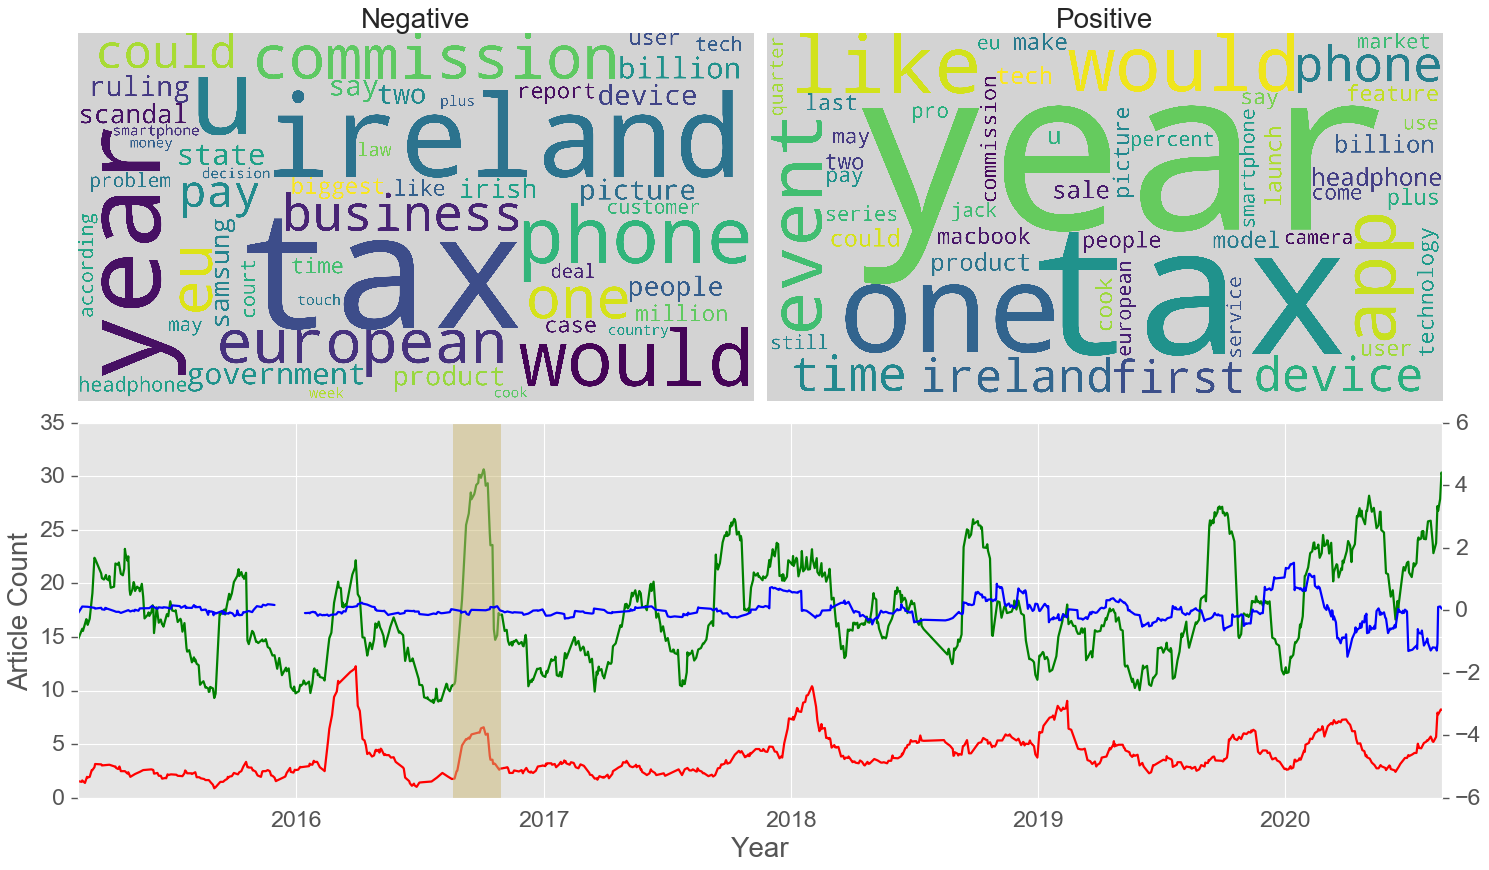

In [743]:
fig, ax = plt.subplots(figsize=(22,12))
plt.subplots_adjust(hspace=.05, wspace=.02)
sns.set(font_scale = 1.9)
plt.style.use('ggplot')

ax1 = plt.subplot(212)
ax4 = ax1.twinx() # daily change line.
ax1.plot(roll_mean.sent_positive, lw=2, color='green', label='positive sentiment')
ax1.plot(roll_mean.sent_negative, lw=2, color='red', label='negative sentiment')
ax1.set_ylabel('Article Count', fontsize=25)
ax1.set_xlabel('Year', fontsize=25)
plt.axvspan(pd.Timestamp('2016-8-20'), pd.Timestamp('2016-10-29'), color='y', alpha=0.5, lw=0)

# twin X axis daily change line
ax4.plot(roll_mean.day_change_x, lw=2, color='blue',label='daily change');
ax4.set_ylim([-6,6])
ax4.grid(False)

ax2 = plt.subplot(222)
ax2.set_title('Positive', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(pos_text_bag_2016)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis("off")

ax3 = plt.subplot(221)
ax3.set_title('Negative', fontsize=25)
wordcloud = WordCloud(max_words=50,collocations=False, width=5500, height=3000, background_color="lightgrey", colormap='viridis', stopwords=stopwords).generate(neg_text_bag_2016)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis("off")

plt.show();

In [751]:
headlines = list(range(0,11))

for article in headlines:
    print(early_2016[early_2016["tokens"].str.contains("tax")].title[article])

Apple launches iPhone 7
Apple has a blip and the world wobbles. Why?
Would consumers stand by market ethics and boycott Apple, a proven value creator but a blatant tax thief?
McLaren deny Apple takeover after reports of £1.5bn offer
Lucky number 7! Apple's stock is soaring
Apple tax raises existential questions for Ireland
EU ministers line up to take bite out of Apple
Apple tax row: Stephen Fry agrees big companies should pay more tax
iPhone 7 probably won't juice Apple stock
Apple event has world holding breath over new iPhone
Juncker says Apple ruling not meant to 'attack the USA'


In [752]:
headlines = list(range(0,20))

for article in headlines:
    print(early_2016[early_2016["tokens"].str.contains("year")].title[article])

Apple’s new TV app is Apple's idea of TV
Apple fans line up for iPhone 7 for two days to find some models are SOLD out
Apple Watch Series 2 review: The same on the outside, but a whole new wearable on the inside
Apple Watch Series 2 review: Less silly, more usable
Apple launches iPhone 7
What iPhone, Other Mobile Devices to Look for at Apple Sept. 7 Event
Apple has a blip and the world wobbles. Why?
Apple Watch Sales Crash, But They Haven’t Burned Yet
To discover which movies to watch, Apple unveils new TV App
Apple adds keyboard touch functions to Mac in major refresh
Everything you missed at Apple's MacBook event
Apple adds keyboard touch functions to Mac in major refresh
Apple launches "TV" app, long-awaited updates to products at Calif. event
As it happened: Apple’s MacBook Pro with Touch Bar to cost ₹1,29,000
Five industries that Apple can disrupt while its car project is on hold
New MacBook Pro 2016 Rumors: Apple Pay, Touch ID, OLED – What’s Apple Showing Off Tomorrow?
Apple's lo